# COVID19 DATA VISUALIZATION 

### By : OUHMAID Khalid                              

#### This a small project of the class data visualization which is suprvised by Prof : Abdessamd Youssfi Allaoui 

#### its about using  the diffirent technics and simulations we see during the online class

#### I choosed to work on analyzing and explore the data of Coronavirus 


### Techniques: Charts, Graphs, Maps


In [1]:
pip install folium

# for maps


     |████████████████████████████████| 93 kB 1.6 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the library needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

### Data Related to Corona Virus affecting the whole world



In [3]:
data = pd.read_csv('cornaData.csv')

In [4]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [5]:
#Description of the data


data.describe(include='all')

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,631.00000,631,487,631,631,631.00000,631.000000,631.000000
unique,NaN,12,53,31,68,NaN,NaN,NaN
top,NaN,2020-01-02 23:00:00,Yunnan,Mainland China,1/31/2020 19:00,NaN,NaN,NaN
freq,NaN,67,12,336,63,NaN,NaN,NaN
mean,316.00000,NaN,NaN,NaN,NaN,124.03962,2.738510,2.759113
std,182.29829,NaN,NaN,NaN,NaN,729.20275,24.205858,17.733449
min,1.00000,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000
25%,158.50000,NaN,NaN,NaN,NaN,2.00000,0.000000,0.000000
50%,316.00000,NaN,NaN,NaN,NaN,8.00000,0.000000,0.000000
75%,473.50000,NaN,NaN,NaN,NaN,49.00000,0.000000,1.000000


In [6]:
#some info about data


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 8 columns):
Sno               631 non-null int64
Date              631 non-null object
Province/State    487 non-null object
Country           631 non-null object
Last Update       631 non-null object
Confirmed         631 non-null float64
Deaths            631 non-null float64
Recovered         631 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 39.5+ KB


#### check about null values

In [7]:
missing_data=data.isnull()

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Sno
False    631
Name: Sno, dtype: int64

Date
False    631
Name: Date, dtype: int64

Province/State
False    487
True     144
Name: Province/State, dtype: int64

Country
False    631
Name: Country, dtype: int64

Last Update
False    631
Name: Last Update, dtype: int64

Confirmed
False    631
Name: Confirmed, dtype: int64

Deaths
False    631
Name: Deaths, dtype: int64

Recovered
False    631
Name: Recovered, dtype: int64



In [9]:
#fill the null values by "unknown".

data["Province/State"].fillna("unknown", inplace = True)  


In [10]:
data['Date'].value_counts()


2020-01-02 23:00:00    67
2020-02-02 21:00:00    67
1/31/2020 19:00        63
1/30/2020 21:30        59
1/29/2020 21:00        56
1/28/2020 23:00        52
1/27/2020 20:30        52
1/26/2020 23:00        47
1/23/20 12:00 PM       45
1/25/2020 10:00 PM     44
1/24/2020 12:00 PM     41
1/22/2020 12:00        38
Name: Date, dtype: int64

### Number of occurence of each date on which Corona Virus affect most

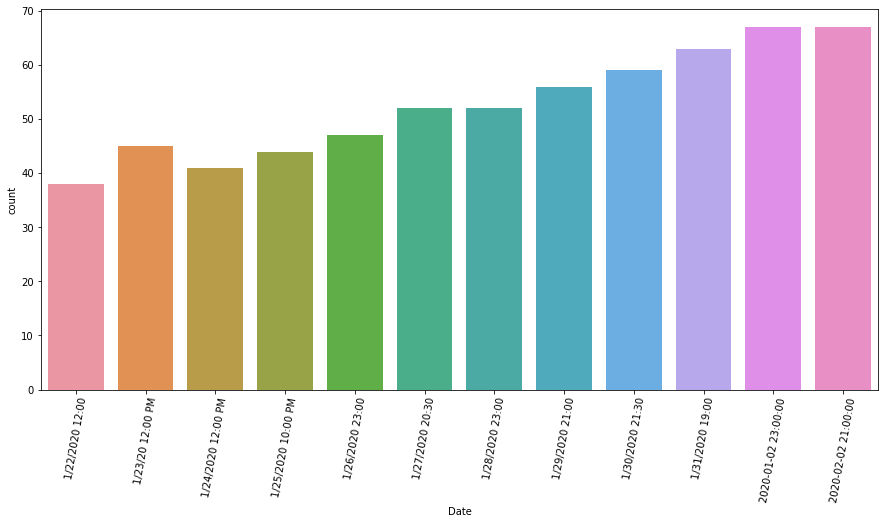

In [11]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Date',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


In [12]:
data['Province/State'].value_counts()


unknown             144
Anhui                12
Ningxia              12
Inner Mongolia       12
Yunnan               12
Xinjiang             12
Jiangsu              12
Heilongjiang         12
Qinghai              12
Beijing              12
Jiangxi              12
Hubei                12
Tianjin              12
Macau                12
Shanghai             12
Guangdong            12
Fujian               12
Hong Kong            12
Taiwan               12
Jilin                12
Guangxi              12
Hunan                12
Liaoning             12
Shandong             12
Chongqing            12
Shanxi               12
Guizhou              12
Sichuan              12
Hebei                12
Hainan               12
Zhejiang             12
Henan                12
Gansu                12
Shaanxi              12
Washington           10
Ontario               8
New South Wales       7
Tibet                 7
Illinois              7
Victoria              7
Arizona               6
California      

### All the states across world affected by Corona Virus along with their frequency


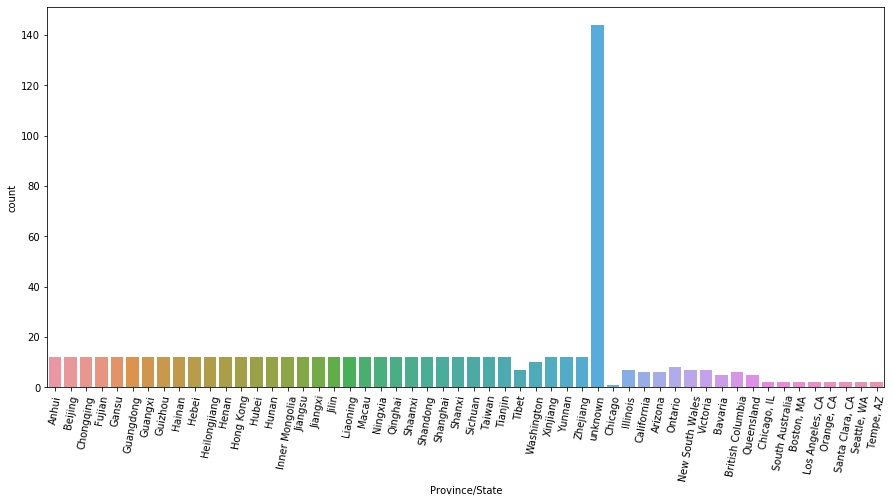

In [13]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Province/State',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

In [14]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

#Set Date column as the index column.
#data.set_index('Last Update', inplace=True)
data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [15]:
data['Country'].value_counts()


Mainland China          336
US                       44
China                    34
Australia                24
Canada                   14
Japan                    12
South Korea              12
Thailand                 12
Taiwan                   11
Vietnam                  11
Hong Kong                11
Macau                    11
Singapore                11
Malaysia                 10
France                   10
Nepal                     9
Cambodia                  7
Sri Lanka                 7
Germany                   7
Philippines               5
United Arab Emirates      5
Finland                   5
India                     4
Italy                     4
Sweden                    3
UK                        3
Spain                     3
Russia                    3
Mexico                    1
Ivory Coast               1
Brazil                    1
Name: Country, dtype: int64

### All the Countries affected by Corona Virus along with their frequency.


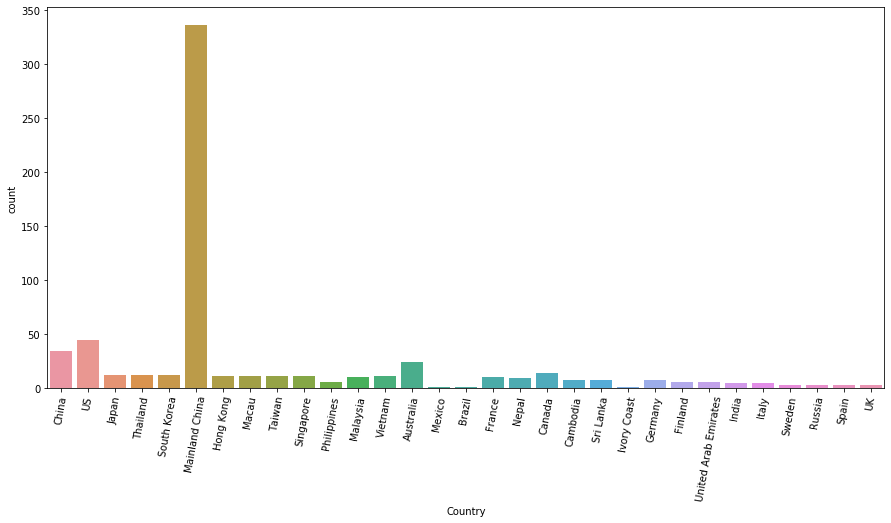

In [16]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Country',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

In [17]:
countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

Total countries affected by virus:  31


In [18]:
#Combining China and Mainland China cases

data['Country'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

Total countries affected by virus:  30


### This shows that China affected most across world by corona virus


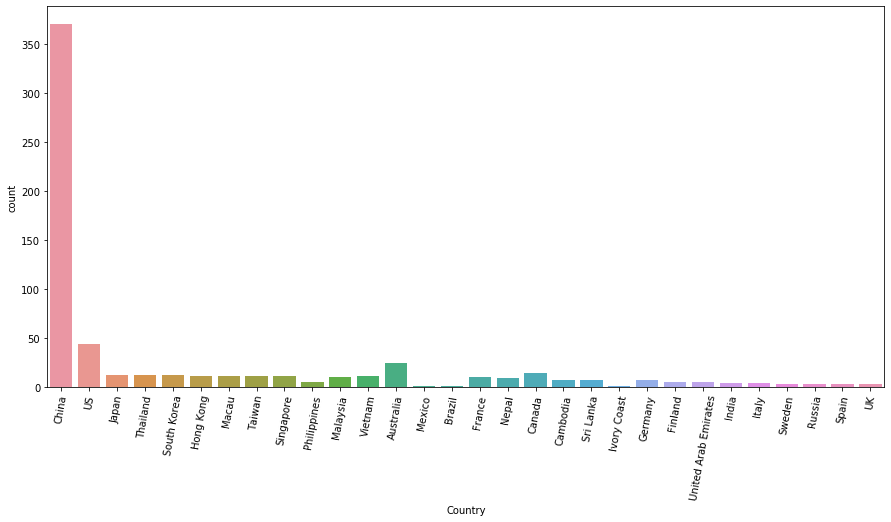

In [19]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Country',data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()


##### Scenario of Current status worldwide



In [20]:
d = data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

from datetime import date
data_latest = data[data['Date'] > pd.Timestamp(date(year,month,day))]
data_latest.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
564,2020-02-02 21:00:00,Hubei,China,2020-02-02 23:43:00,11177.0,350.0,295.0
565,2020-02-02 21:00:00,Zhejiang,China,2020-03-02 01:33:00,724.0,0.0,36.0
566,2020-02-02 21:00:00,Guangdong,China,2020-03-02 01:33:00,683.0,0.0,15.0
567,2020-02-02 21:00:00,Henan,China,2020-03-02 01:03:00,566.0,2.0,14.0
568,2020-02-02 21:00:00,Hunan,China,2020-03-02 01:33:00,521.0,0.0,16.0


In [21]:
data_latest.describe(include='all')


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,67,67,67,67,67.000000,67.000000,67.000000
unique,1,48,27,38,NaN,NaN,NaN
top,2020-02-02 21:00:00,unknown,China,1/31/2020 8:15,NaN,NaN,NaN
freq,67,20,31,6,NaN,NaN,NaN
first,2020-02-02 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-02 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,258.134328,5.402985,7.268657
std,NaN,NaN,NaN,NaN,1364.257650,42.739897,36.179092
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000


In [22]:
# Creating a dataframe with total no of confirmed cases for every country currently
Number_of_countries = len(data_latest['Country'].value_counts())

cases = pd.DataFrame(data_latest.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
1,Australia,12.0
2,Cambodia,1.0
3,Canada,4.0
4,China,17114.0
5,Finland,1.0
6,France,6.0
7,Germany,10.0
8,Hong Kong,15.0
9,India,2.0
10,Italy,2.0


In [23]:
# A look at the different cases - confirmed, death and recovered currently.
print('Globally Confirmed Cases: ',data_latest['Confirmed'].sum())
print('Global Deaths: ',data_latest['Deaths'].sum())
print('Globally Recovered Cases: ',data_latest['Recovered'].sum())

Globally Confirmed Cases:  17295.0
Global Deaths:  362.0
Globally Recovered Cases:  487.0


In [24]:
# Let's look the various Provinces/States affected
data_latest.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country              Province/State                                
Australia            New South Wales         4.0     0.0        2.0
                     Queensland              2.0     0.0        0.0
                     South Australia         2.0     0.0        0.0
                     Victoria                4.0     0.0        0.0
Cambodia             unknown                 1.0     0.0        0.0
Canada               British Columbia        1.0     0.0        0.0
                     Ontario                 3.0     0.0        0.0
China                Anhui                 408.0     0.0        7.0
                     Beijing               191.0     1.0        9.0
                     Chongqing             300.0     2.0        7.0
                     Fujian                159.0     0.0        0.0
                     Gansu                  51.0     0.0        3.0
                     Guangdong             683.0     0.0       15.0
                     Guangxi               127.0     0.0        2.0
                     Guizhou                46.0     0.0        2.0
                     Hainan                 71.0     1.0        4.0
                     Hebei                 113.0     1.0        3.0
                     Heilongjiang           95.0     2.0        2.0
                     Henan                 566.0     2.0       14.0
                     Hubei               11177.0   350.0      295.0
                     Hunan                 521.0     0.0       16.0
                     Inner Mongolia         27.0     0.0        1.0
                     Jiangsu               271.0     0.0        7.0
                     Jiangxi               391.0     0.0       18.0
                     Jilin                  31.0     0.0        1.0
                     Liaoning               70.0     0.0        1.0
                     Ningxia                28.0     0.0        0.0
                     Qinghai                11.0     0.0        0.0
                     Shaanxi               116.0     0.0        0.0
                     Shandong              246.0     0.0        6.0
...                                          ...     ...        ...
                     Zhejiang              724.0     0.0       36.0
Finland              unknown                 1.0     0.0        0.0
France               unknown                 6.0     0.0        0.0
Germany              unknown                10.0     0.0        0.0
Hong Kong            Hong Kong              15.0     0.0        0.0
India                unknown                 2.0     0.0        0.0
Italy                unknown                 2.0     0.0        0.0
Japan                unknown                20.0     0.0        1.0
Macau                Macau                   8.0     0.0        0.0
Malaysia             unknown                 8.0     0.0        0.0
Nepal                unknown                 1.0     0.0        0.0
Philippines          unknown                 2.0     1.0        0.0
Russia               unknown                 2.0     0.0        0.0
Singapore            unknown                18.0     0.0        0.0
South Korea          unknown                15.0     0.0        0.0
Spain                unknown                 1.0     0.0        0.0
Sri Lanka            unknown                 1.0     0.0        0.0
Sweden               unknown                 1.0     0.0        0.0
Taiwan               Taiwan                 10.0     0.0        0.0
Thailand             unknown                19.0     0.0        5.0
UK                   unknown                 2.0     0.0        0.0
US                   Boston, MA              1.0     0.0        0.0
                     Chicago, IL             2.0     0.0        0.0
                     Los Angeles, CA         1.0     0.0        0.0
                     Orange, CA              1.0     0.0        0.0
                     Santa Clara, CA         2.0     0.0        0.0
                     Seattl

In [25]:
# Provinces where deaths have taken place
data_latest.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
China          361.0
Philippines      1.0
Vietnam          0.0
Malaysia         0.0
Cambodia         0.0
Name: Deaths, dtype: float64

In [26]:
# Lets also look at the Recovered stats
data_latest.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
China        478.0
Thailand       5.0
Australia      2.0
Japan          1.0
Vietnam        1.0
Name: Recovered, dtype: float64

#### Current scene of China¶


In [27]:
China = data_latest[data_latest['Country']=='China']
China

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
564,2020-02-02 21:00:00,Hubei,China,2020-02-02 23:43:00,11177.0,350.0,295.0
565,2020-02-02 21:00:00,Zhejiang,China,2020-03-02 01:33:00,724.0,0.0,36.0
566,2020-02-02 21:00:00,Guangdong,China,2020-03-02 01:33:00,683.0,0.0,15.0
567,2020-02-02 21:00:00,Henan,China,2020-03-02 01:03:00,566.0,2.0,14.0
568,2020-02-02 21:00:00,Hunan,China,2020-03-02 01:33:00,521.0,0.0,16.0
569,2020-02-02 21:00:00,Anhui,China,2020-03-02 00:53:00,408.0,0.0,7.0
570,2020-02-02 21:00:00,Jiangxi,China,2020-03-02 01:33:00,391.0,0.0,18.0
571,2020-02-02 21:00:00,Chongqing,China,2020-02-02 23:33:00,300.0,2.0,7.0
572,2020-02-02 21:00:00,Jiangsu,China,2020-03-02 01:03:00,271.0,0.0,7.0
573,2020-02-02 21:00:00,Sichuan,China,2020-03-02 01:03:00,254.0,1.0,12.0


## Confirmed and Recovered statistics of each state of china currently


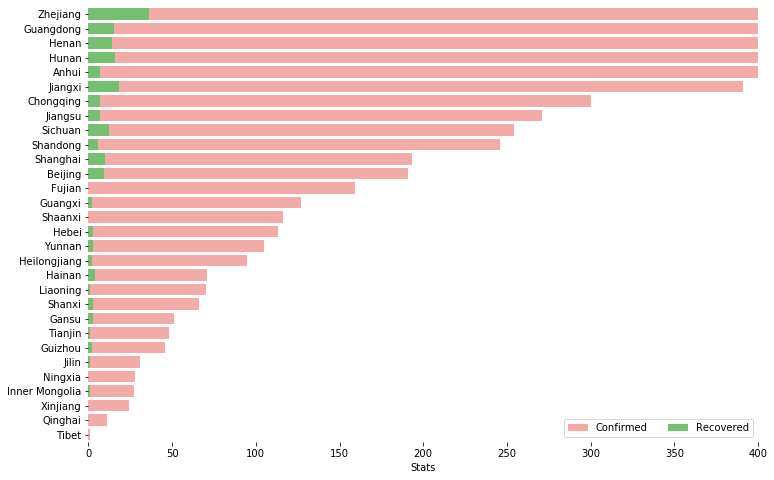

In [28]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)


### Lets look on condition of China¶


In [29]:
China['Date'].value_counts() #current status is of 4/2/2020.


2020-02-02 21:00:00    31
Name: Date, dtype: int64

In [30]:
China['Confirmed'].sum()   #Total confirm case of virus at china currently


17114.0

In [31]:
China['Deaths'].sum()    #Total death case of virus at china currently


361.0

In [32]:
China['Recovered'].sum()          #Total recover case of virus at china currently


478.0

In [33]:
China.nlargest(5, ['Confirmed'])      #top 5 states affected by corona in china currently


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
564,2020-02-02 21:00:00,Hubei,China,2020-02-02 23:43:00,11177.0,350.0,295.0
565,2020-02-02 21:00:00,Zhejiang,China,2020-03-02 01:33:00,724.0,0.0,36.0
566,2020-02-02 21:00:00,Guangdong,China,2020-03-02 01:33:00,683.0,0.0,15.0
567,2020-02-02 21:00:00,Henan,China,2020-03-02 01:03:00,566.0,2.0,14.0
568,2020-02-02 21:00:00,Hunan,China,2020-03-02 01:33:00,521.0,0.0,16.0


In [34]:
China.nlargest(5, ['Deaths'])         #top 5 states in which death occurs most by corona in china currently


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
564,2020-02-02 21:00:00,Hubei,China,2020-02-02 23:43:00,11177.0,350.0,295.0
567,2020-02-02 21:00:00,Henan,China,2020-03-02 01:03:00,566.0,2.0,14.0
571,2020-02-02 21:00:00,Chongqing,China,2020-02-02 23:33:00,300.0,2.0,7.0
582,2020-02-02 21:00:00,Heilongjiang,China,2020-02-02 03:23:00,95.0,2.0,2.0
573,2020-02-02 21:00:00,Sichuan,China,2020-03-02 01:03:00,254.0,1.0,12.0


In [35]:
China.nlargest(5, ['Recovered'])      #top 5 states in which recovery occurs most from corona in china currently


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
564,2020-02-02 21:00:00,Hubei,China,2020-02-02 23:43:00,11177.0,350.0,295.0
565,2020-02-02 21:00:00,Zhejiang,China,2020-03-02 01:33:00,724.0,0.0,36.0
570,2020-02-02 21:00:00,Jiangxi,China,2020-03-02 01:33:00,391.0,0.0,18.0
568,2020-02-02 21:00:00,Hunan,China,2020-03-02 01:33:00,521.0,0.0,16.0
566,2020-02-02 21:00:00,Guangdong,China,2020-03-02 01:33:00,683.0,0.0,15.0


In [36]:
data_china=data[data['Country']=='China']
data_china.head()


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [37]:
data_china.describe(include='all')


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,370,370,370,370,370.000000,370.000000,370.000000
unique,12,34,1,49,NaN,NaN,NaN
top,2020-01-22 12:00:00,Ningxia,China,1/22/2020 12:00,NaN,NaN,NaN
freq,34,12,370,34,NaN,NaN,NaN
first,2020-01-02 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-02 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,208.770270,4.664865,4.559459
std,NaN,NaN,NaN,NaN,943.624115,31.485810,22.989522
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,9.000000,0.000000,0.000000


In [38]:
data_china['Date'].value_counts()


2020-01-22 12:00:00    34
2020-01-30 21:30:00    31
2020-01-29 21:00:00    31
2020-01-23 12:00:00    31
2020-01-31 19:00:00    31
2020-02-02 21:00:00    31
2020-01-02 23:00:00    31
2020-01-28 23:00:00    30
2020-01-26 23:00:00    30
2020-01-24 12:00:00    30
2020-01-27 20:30:00    30
2020-01-25 22:00:00    30
Name: Date, dtype: int64

## Number of occurence of each date on which Corona Virus affect most in china


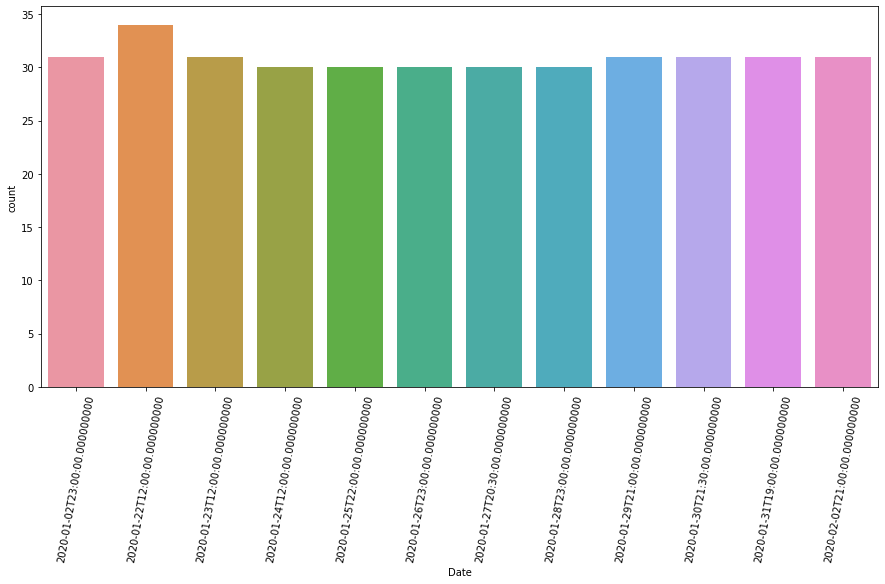

In [39]:
fig = plt.figure(figsize=(15,7))
chart=sns.countplot(x='Date',data=data_china)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

### States in China that are affected by Corona Virus

In [40]:
data_china['Province/State'].unique().tolist()


['Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Taiwan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang']

### Frequency of (Confirmed,Deaths,Recovered) cases in each state of china.

In [41]:
d=data_china.groupby(['Province/State']).sum()
d

,Confirmed,Deaths,Recovered
Province/State,,,
Anhui,1835.0,0.0,20.0
Beijing,1107.0,7.0,43.0
Chongqing,1677.0,4.0,14.0
Fujian,850.0,1.0,0.0
Gansu,249.0,0.0,3.0
Guangdong,3174.0,0.0,73.0
Guangxi,709.0,0.0,12.0
Guizhou,177.0,0.0,8.0
Hainan,419.0,7.0,7.0


In [42]:
x=d['Confirmed'].sum()    #total confirm cases of corona virus in china.
x

77245.0

In [43]:
y=d['Deaths'].sum()               #total death cases of corona virus in china.
y


1726.0

In [44]:
z=d['Recovered'].sum()                #total recoveer cases of corona virus in china.
z

1687.0

In [45]:
death=y/x*100                      #Death Percentage in china
death

2.2344488316395883

In [46]:
z/x*100                #Recovery Percentage in china


2.1839601268690534

## Overview of china condition due to corona virus


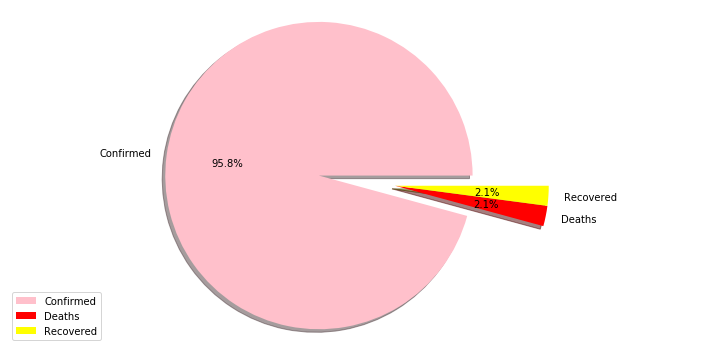

In [47]:
plt.figure(figsize=(10,5))
labels=['Confirmed','Deaths','Recovered']
colors=['pink','red','yellow']
explode=[0.5,0,0]
values=[x,y,z]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Confirmed','Deaths','Recovered'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Comaprision of statistics of Confirm and recover cases of corona at China in each state

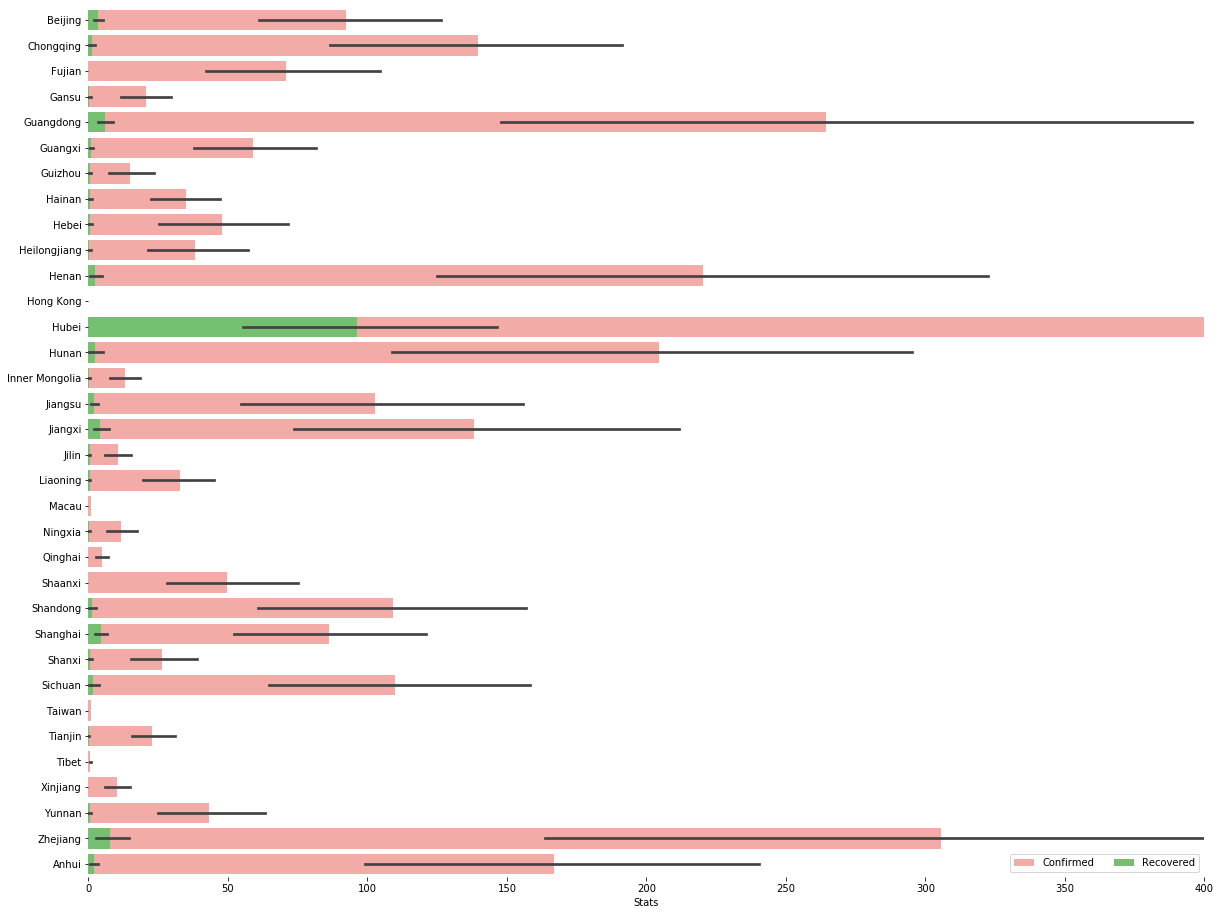

In [48]:
f, ax = plt.subplots(figsize=(20, 16))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=data_china[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=data_china[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [49]:
d1=d.nlargest(5, ['Confirmed'])    
d1= d1.reset_index()
d1

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,47976.0,1653.0,1157.0
1,Zhejiang,3668.0,0.0,93.0
2,Guangdong,3174.0,0.0,73.0
3,Henan,2645.0,15.0,27.0
4,Hunan,2452.0,0.0,29.0


### top 5 states of china having most confirm cases of corona virus .


Text(0.5, 1.0, 'Corona Virus most frequent Confirmed cases in china')

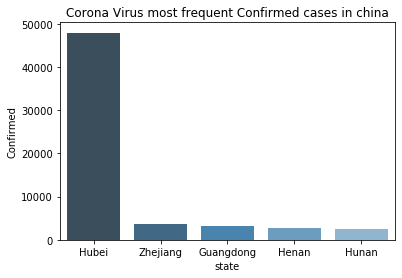

In [50]:
ax=sns.barplot(x=d1['Province/State'],y=d1['Confirmed'],palette="Blues_d")
plt.xlabel('state')
plt.ylabel('Confirmed')
plt.title('Corona Virus most frequent Confirmed cases in china')

In [51]:
d2=d.nlargest(5, ['Deaths']) 
d2=d2.reset_index()
d2

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,47976.0,1653.0,1157.0
1,Henan,2645.0,15.0,27.0
2,Heilongjiang,460.0,13.0,4.0
3,Hebei,576.0,11.0,6.0
4,Shanghai,1036.0,9.0,53.0


### top 5 states of china having most death cases of corona virus


Text(0.5, 1.0, 'Corona Virus most frequent Death cases in china')

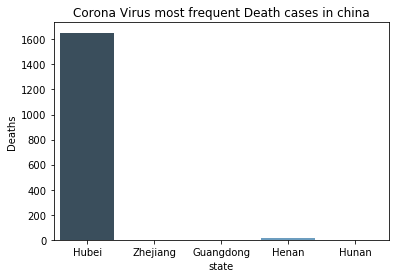

In [52]:
ax=sns.barplot(x=d1['Province/State'],y=d1['Deaths'],palette="Blues_d")
plt.xlabel('state')
plt.ylabel('Deaths')
plt.title('Corona Virus most frequent Death cases in china')

In [53]:
d3=d.nlargest(5, ['Recovered']) 
d3=d3.reset_index()
d3

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,47976.0,1653.0,1157.0
1,Zhejiang,3668.0,0.0,93.0
2,Guangdong,3174.0,0.0,73.0
3,Shanghai,1036.0,9.0,53.0
4,Jiangxi,1658.0,0.0,51.0


### top 5 states of china having most recover cases of corona virus


Text(0.5, 1.0, 'Corona Virus most frequent Recovered cases in china')

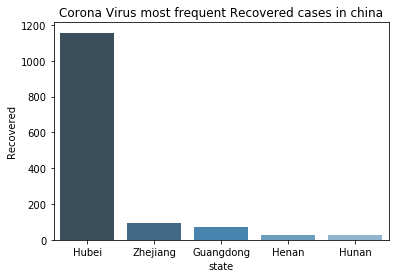

In [54]:
ax=sns.barplot(x=d1['Province/State'],y=d1['Recovered'],palette="Blues_d")
plt.xlabel('state')
plt.ylabel('Recovered')
plt.title('Corona Virus most frequent Recovered cases in china')

### see the statistics on each date of china


In [55]:
dd=data_china.groupby(['Date']).sum()
dd  

,Confirmed,Deaths,Recovered
Date,,,
2020-01-02 23:00:00,14375.0,304.0,331.0
2020-01-22 12:00:00,549.0,0.0,0.0
2020-01-23 12:00:00,639.0,18.0,30.0
2020-01-24 12:00:00,916.0,26.0,36.0
2020-01-25 22:00:00,1979.0,56.0,49.0
2020-01-26 23:00:00,2737.0,80.0,51.0
2020-01-27 20:30:00,4409.0,107.0,60.0
2020-01-28 23:00:00,5970.0,132.0,104.0
2020-01-29 21:00:00,7678.0,170.0,127.0


## Growth of confirmed cases of corona virus in China

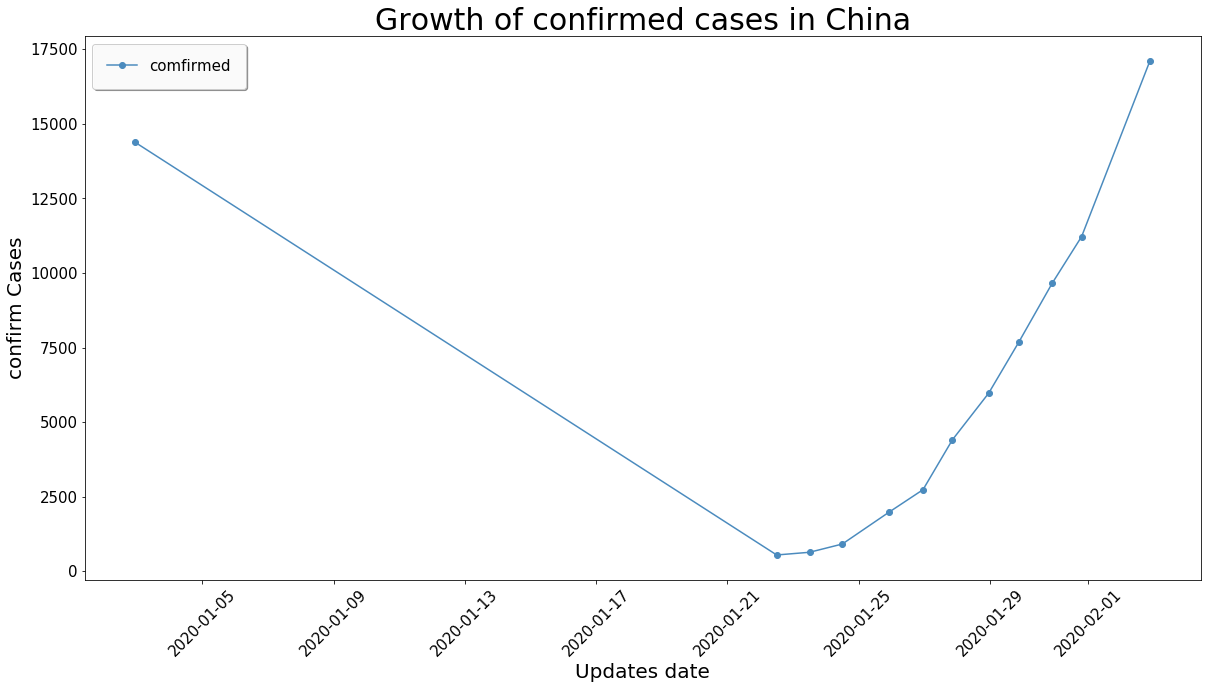

In [56]:
# defyning plotsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(dd['Confirmed']
        , color = '#4b8bbe'
        , label = 'comfirmed'
        , marker = 'o')

# titles parameters
plt.title('Growth of confirmed cases in China',size=30)
plt.ylabel('confirm Cases',size=20)
plt.xlabel('Updates date',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);


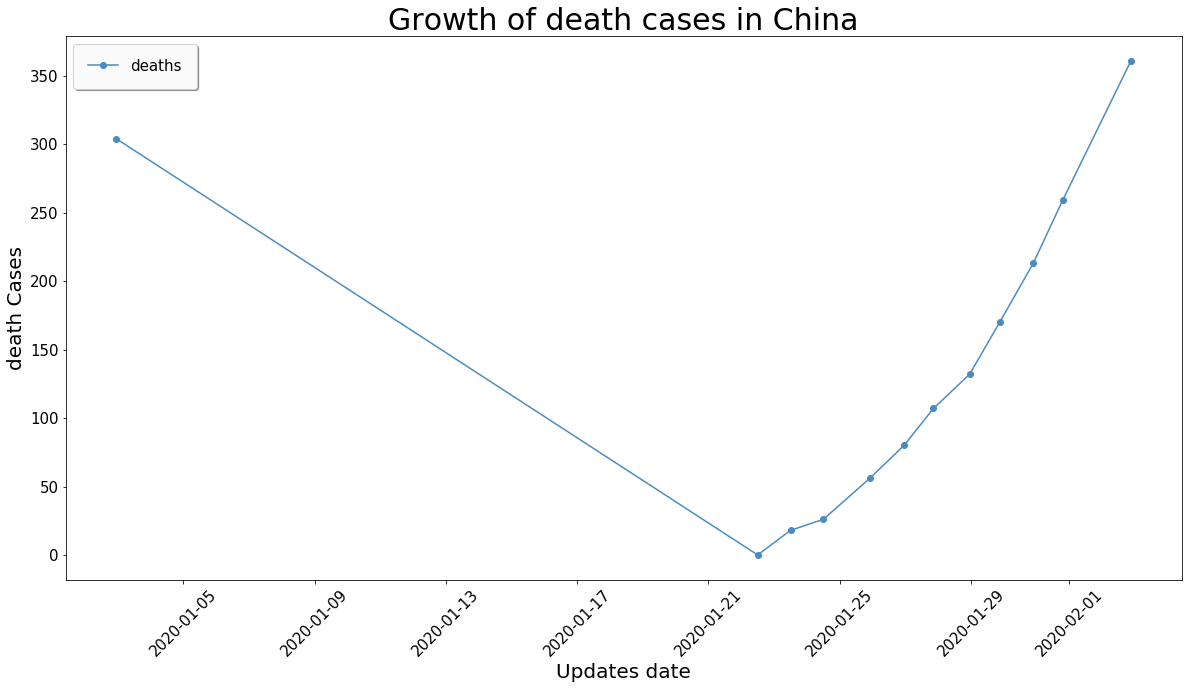

In [57]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(dd['Deaths']
        , color = '#4b8bbe'
        , label = 'deaths'
        , marker = 'o')

# titles parameters
plt.title('Growth of death cases in China',size=30)
plt.ylabel('death Cases',size=20)
plt.xlabel('Updates date',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

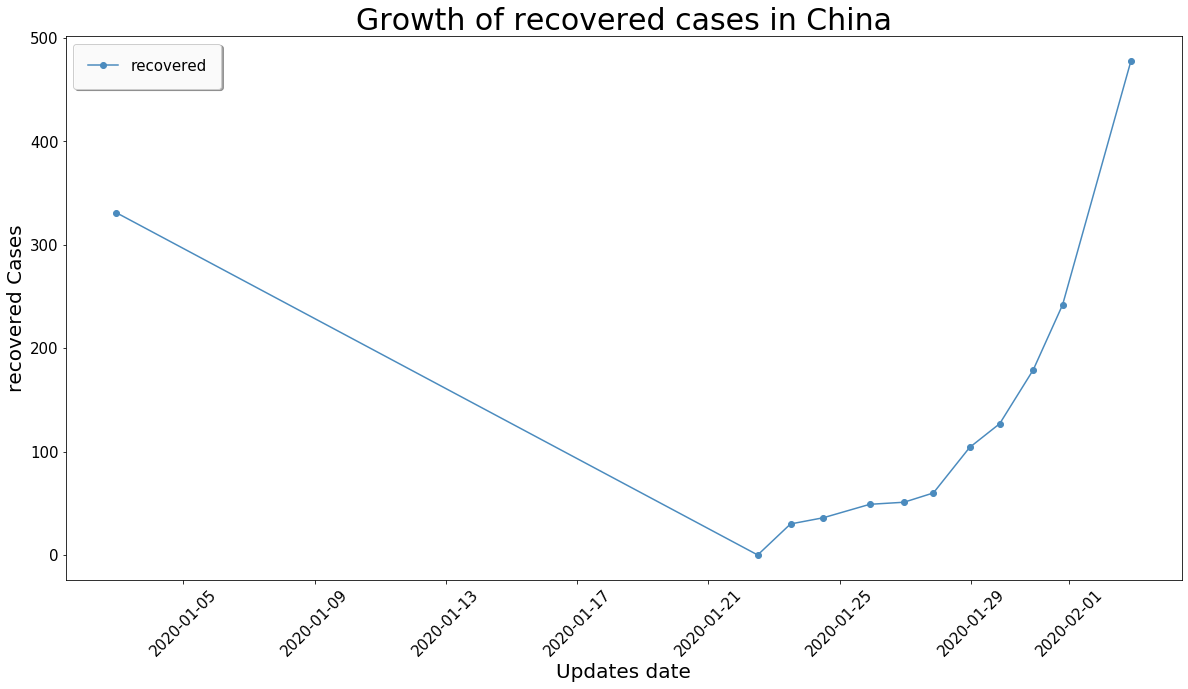

In [58]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(dd['Recovered']
        , color = '#4b8bbe'
        , label = 'recovered'
        , marker = 'o')

# titles parameters
plt.title('Growth of recovered cases in China',size=30)
plt.ylabel('recovered Cases',size=20)
plt.xlabel('Updates date',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);


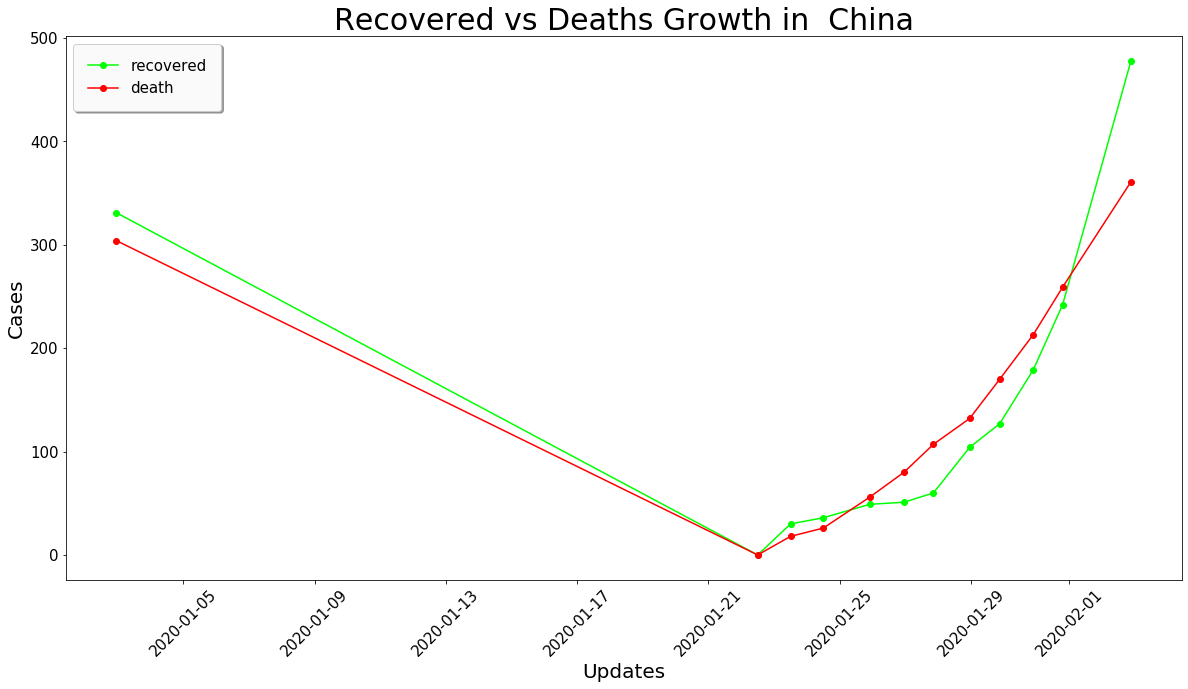

In [59]:
plt.figure(figsize=(20,10))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(dd['Recovered']
        , color = 'lime'
        , label = 'recovered'
        , marker = 'o')

plt.plot(dd['Deaths']
        , color = 'red'
        , label = 'death'
        , marker = 'o')



# defyning titles, labels and ticks parameters
plt.title('Recovered vs Deaths Growth in  China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);


In [60]:
aaa=data_china.groupby(['Province/State','Date']).sum()
aaa.head()     

Confirmed  Deaths  Recovered
Province/State Date                                             
Anhui          2020-01-02 23:00:00      340.0     0.0        5.0
               2020-01-22 12:00:00        1.0     0.0        0.0
               2020-01-23 12:00:00        9.0     0.0        0.0
               2020-01-24 12:00:00       15.0     0.0        0.0
               2020-01-25 22:00:00       60.0     0.0        0.0

In [61]:
print('Globally Confirmed Cases: ',data['Confirmed'].sum())
print('Global Deaths: ',data['Deaths'].sum())
print('Globally Recovered Cases: ',data['Recovered'].sum())

Globally Confirmed Cases:  78269.0
Global Deaths:  1728.0
Globally Recovered Cases:  1741.0


In [62]:
c1=data['Confirmed'].sum()
c2=data['Deaths'].sum()
c3=data['Recovered'].sum()

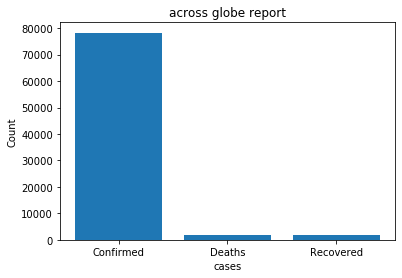

In [63]:
labels = ('Confirmed','Deaths','Recovered')
x_index = [0,1,2]

# indexes is the first parameter 
plt.bar(x_index, [c1,c2,c3], width = 0.8, align='center', alpha=1.0)

# First Parameters is the indexes and second paramters is the labels
plt.xticks(x_index, labels)

plt.xlabel('cases')
plt.ylabel('Count')

plt.title('across globe report')
 
plt.show()

## Overview of whole globe condition due to corona virus

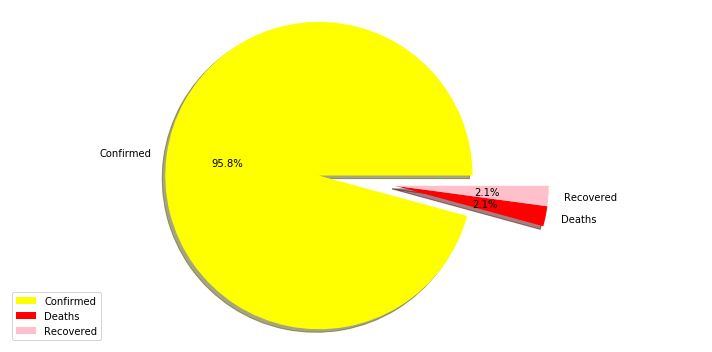

In [64]:
plt.figure(figsize=(10,5))
labels=['Confirmed','Deaths','Recovered']
colors=['yellow','red','pink']
explode=[0.5,0,0]
values=[c1,c2,c3]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Confirmed','Deaths','Recovered'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [65]:
# Creating a dataframe with total no of confirmed cases for every country
Number_of_countries = len(data['Country'].value_counts())


cases = pd.DataFrame(data.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases


,Country,Confirmed
1,Australia,67.0
2,Brazil,0.0
3,Cambodia,7.0
4,Canada,21.0
5,China,77245.0
6,Finland,5.0
7,France,43.0
8,Germany,38.0
9,Hong Kong,97.0
10,India,5.0


## confirm cases of corona across each country

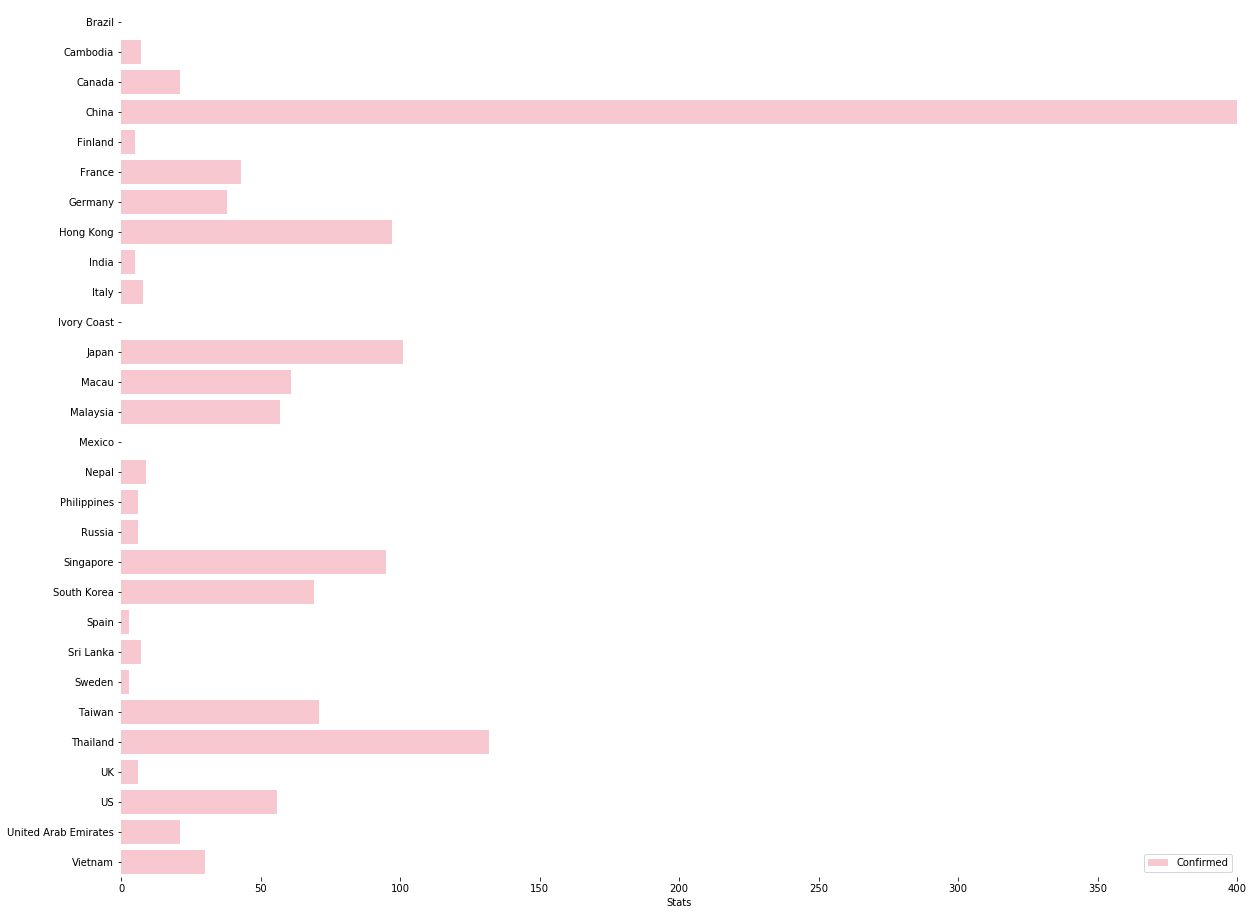

In [66]:
f, ax = plt.subplots(figsize=(20, 16))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country", data=global_cases[1:],
            label="Confirmed", color="pink")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)


## total no of confirmed,death,recover cases for every country

In [67]:
ddd=data.groupby(['Country']).sum()


In [68]:
ddd


,Confirmed,Deaths,Recovered
Country,,,
Australia,67.0,0.0,8.0
Brazil,0.0,0.0,0.0
Cambodia,7.0,0.0,0.0
Canada,21.0,0.0,0.0
China,77245.0,1726.0,1687.0
Finland,5.0,0.0,0.0
France,43.0,0.0,0.0
Germany,38.0,0.0,0.0
Hong Kong,97.0,0.0,0.0


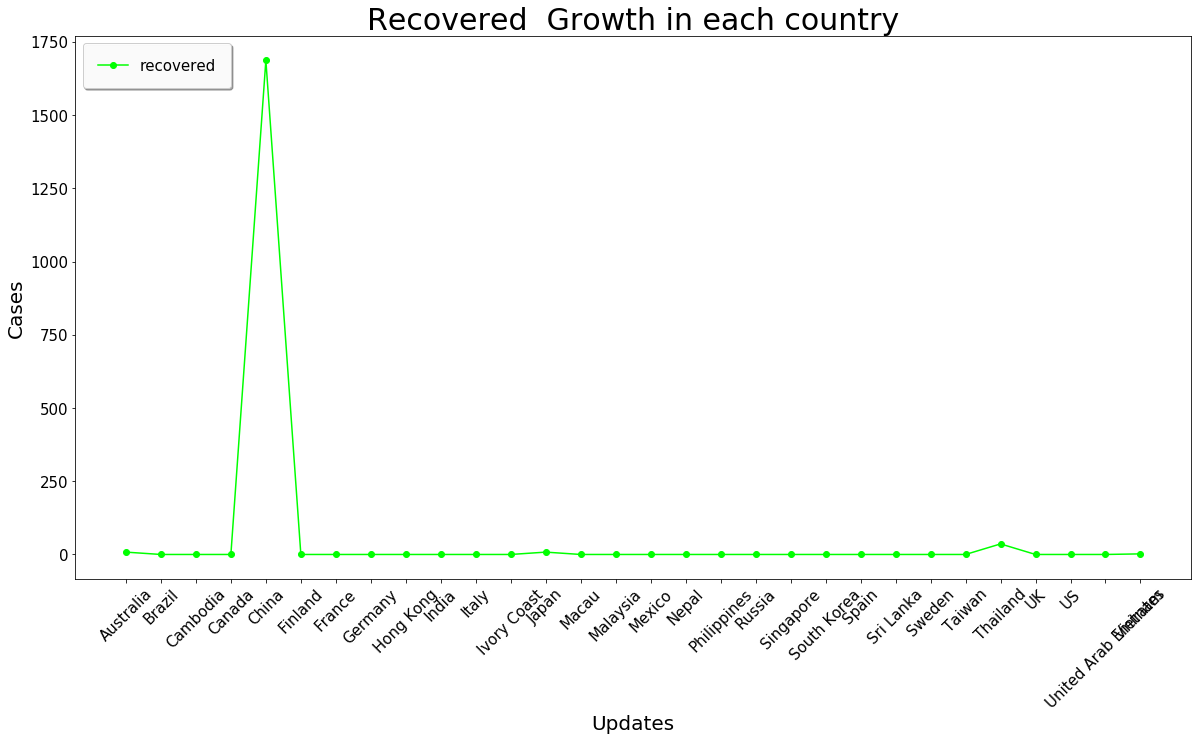

In [69]:
plt.figure(figsize=(20
                    ,10))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(ddd['Recovered']
        , color = 'lime'
        , label = 'recovered'
        , marker = 'o')



# defyning titles, labels and ticks parameters
plt.title('Recovered  Growth in each country',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

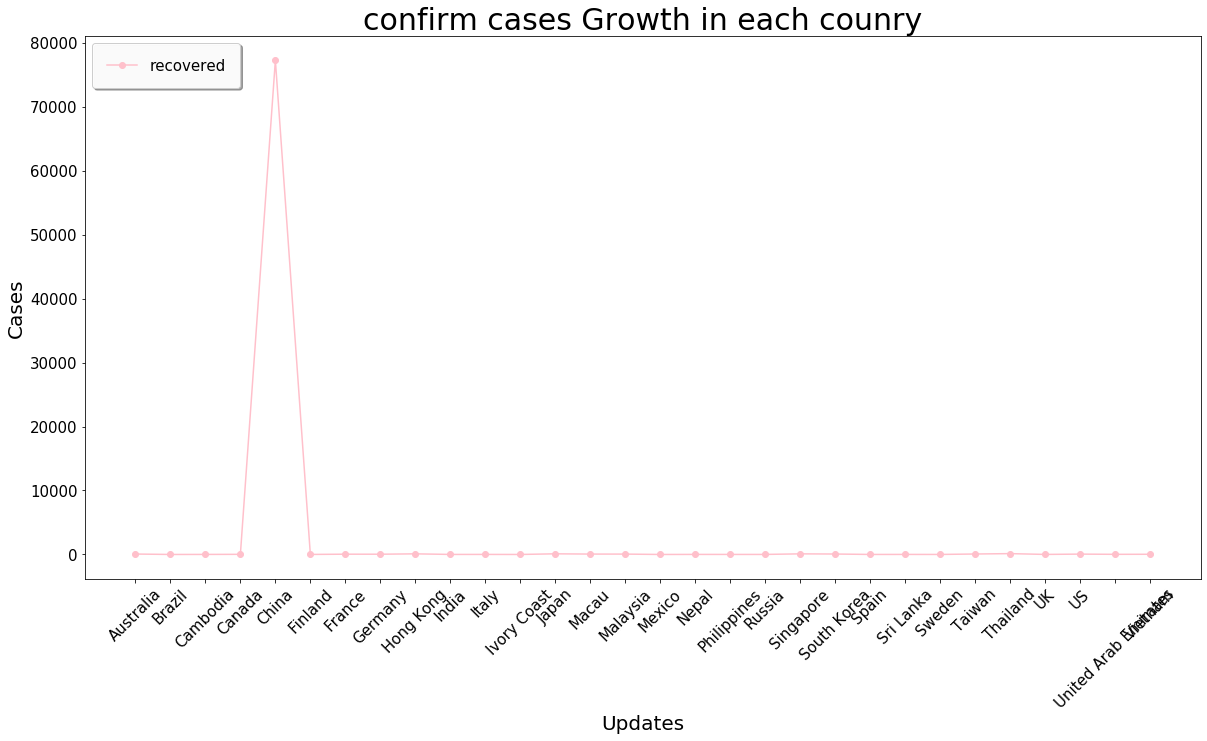

In [70]:
plt.figure(figsize=(20
                    ,10))

plt.plot(ddd['Confirmed']
        , color = 'pink'
        , label = 'recovered'
        , marker = 'o')



# defyning titles, labels and ticks parameters
plt.title('confirm cases Growth in each counry',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [71]:
world_coordinates=pd.read_csv('cornaData.csv')


In [72]:
world_coordinates.head()


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [73]:
world_coordinates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 8 columns):
Sno               631 non-null int64
Date              631 non-null object
Province/State    487 non-null object
Country           631 non-null object
Last Update       631 non-null object
Confirmed         631 non-null float64
Deaths            631 non-null float64
Recovered         631 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 39.5+ KB


In [74]:
world_coordinates.describe(include='all')


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,631.00000,631,487,631,631,631.00000,631.000000,631.000000
unique,NaN,12,53,31,68,NaN,NaN,NaN
top,NaN,2020-01-02 23:00:00,Yunnan,Mainland China,1/31/2020 19:00,NaN,NaN,NaN
freq,NaN,67,12,336,63,NaN,NaN,NaN
mean,316.00000,NaN,NaN,NaN,NaN,124.03962,2.738510,2.759113
std,182.29829,NaN,NaN,NaN,NaN,729.20275,24.205858,17.733449
min,1.00000,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000
25%,158.50000,NaN,NaN,NaN,NaN,2.00000,0.000000,0.000000
50%,316.00000,NaN,NaN,NaN,NaN,8.00000,0.000000,0.000000
75%,473.50000,NaN,NaN,NaN,NaN,49.00000,0.000000,1.000000


In [75]:
# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(world_coordinates,global_cases,on='Country')
world_data.head()


,Sno,Date,Province/State,Country,Last Update,Confirmed_x,Deaths,Recovered,Confirmed_y
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0,77245.0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0,77245.0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0,77245.0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0,77245.0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0,77245.0


In [76]:
world_data.describe(include='all')


,Sno,Date,Province/State,Country,Last Update,Confirmed_x,Deaths,Recovered,Confirmed_y
count,295.000000,295,151,295,295,295.000000,295.000000,295.000000,295.000000
unique,NaN,12,53,30,35,NaN,NaN,NaN,NaN
top,NaN,1/22/2020 12:00,Taiwan,US,1/22/2020 12:00,NaN,NaN,NaN,NaN
freq,NaN,38,12,44,38,NaN,NaN,NaN,NaN
mean,336.220339,NaN,NaN,NaN,NaN,5.332203,0.006780,0.183051,8948.898305
std,197.083434,NaN,NaN,NaN,NaN,25.995908,0.082199,0.820891,24691.804784
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,165.500000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,21.000000
50%,360.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,57.000000
75%,495.500000,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000,95.000000


In [85]:
# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['Deaths'], world_data['Recovered'], world_data['Confirmed_y'], world_data['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

# created the above map by using Folium Maps. You can click on the red bubbles to get information about the region and the number of confirmed cases there.
